### 다중분류  
- 숫자 이미지 프로세싱


In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import sys
from tensorflow.keras.utils import to_categorical

In [2]:
# 70,000개 중 학습에 사용될 부분 : train, 테스트에 사용될 부분 : test
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("학습셋 이미지 수 : %d개" % (X_train.shape[0])) # 전체 로우 수 출력
print("테스트셋 이미지 수 : %d개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


In [3]:
# row수, 가로픽셀, 세로픽셀
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

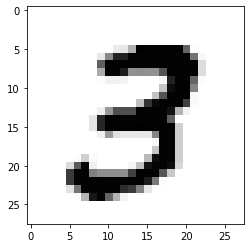

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7], cmap='Greys') # 첫번째 데이터 확인
plt.show

In [5]:
# 28 x 28 픽셀 루프로 값 확인
# 0부터 255까지 밝기 정도에 따라 값 출력됨
for x in X_train[7]: 
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	38	43	105	255	253	253	253	253	253	174	6	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	43	139	224	226	252	253	252	252	252	252	252	252	158	14	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	178	252	252	252	252	253	252	252	252	252	252	252	252	59	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	109	252	252	230	132	133	132	132	189	252	252	252	252	59	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	4	29	29	24	0	0	0	0	14	226	252	252	172	7	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	85	243	252	252	144	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	88	189	252	252	252	14	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	91	212	247	252	252	252	204	9	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	32	125	193	193	193	253	252	252	252	238	102	28	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	45	222	252	252	252	252

In [6]:
# 28 x 28을 784개의 1차원 배열로 바꿔주기
# reshape(총 샘플 수, 1차원 속성의 수)
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train.astype(float)
# 0 ~ 1 사이의 수로 스케일링 해주기
X_train = X_train / 255

# 테스트 데이터도 훈련데이터와 똑같이 
X_test = X_test.reshape(X_test.shape[0], -1).astype(float) / 255

In [7]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [8]:
print("target : %d" % (y_train[7])) # 하나만 찍어내기

target : 3


### to categorical  
- 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]  
- 마지막에 softmax함수 쓸 수 있도록 변환

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[7])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 28x28 픽셀 수 input
model.add(Dense(10, activation='softmax')) # 0 ~ 9 총 10개 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델 컴파일
import os
model.compile(loss='categorical_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

# 모델 폴더에 model저장
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,\
                              monitor='val_loss',\
                              verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [14]:
history = model.fit(X_train, y_train, 
                    validation_data=\
                   (X_test, y_test), epochs=30, batch_size=200, verbose=0,\ # epoch 30번 
                   callbacks=[early_stopping_callback,\
                             checkpointer])


Epoch 00001: val_loss improved from inf to 0.15683, saving model to ./model\01-0.1568.hdf5

Epoch 00002: val_loss improved from 0.15683 to 0.10588, saving model to ./model\02-0.1059.hdf5

Epoch 00003: val_loss improved from 0.10588 to 0.08607, saving model to ./model\03-0.0861.hdf5

Epoch 00004: val_loss improved from 0.08607 to 0.07232, saving model to ./model\04-0.0723.hdf5

Epoch 00005: val_loss improved from 0.07232 to 0.06626, saving model to ./model\05-0.0663.hdf5

Epoch 00006: val_loss improved from 0.06626 to 0.06343, saving model to ./model\06-0.0634.hdf5

Epoch 00007: val_loss improved from 0.06343 to 0.06285, saving model to ./model\07-0.0629.hdf5

Epoch 00008: val_loss improved from 0.06285 to 0.05976, saving model to ./model\08-0.0598.hdf5

Epoch 00009: val_loss improved from 0.05976 to 0.05942, saving model to ./model\09-0.0594.hdf5

Epoch 00010: val_loss did not improve from 0.05942

Epoch 00011: val_loss did not improve from 0.05942

Epoch 00012: val_loss did not impro

In [15]:
# 정확도
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0724 - accuracy: 0.9816

 Test Accuracy: 0.9816


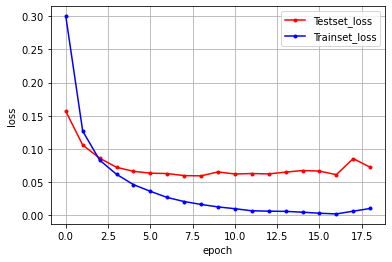

In [17]:
# 오차 변수 선언
y_vloss = history.history['val_loss'] # test데이터의 loss(오차)
y_loss = history.history['loss'] # train 데이터의 loss

# 그래프 그려보기
X_len = np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker='.', c='red',\
        label='Testset_loss')
plt.plot(X_len, y_loss, marker='.', c='blue',\
        label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


- 학습셋에 대한 오차는 계속해서 줄어듬  
- 테스트셋의 과적합이 일어나기 전 학습을 끝낸 모습  